In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import time
import math

In [2]:
# Configuration variables
a = 2
q = 9
u_init = 0.09
omega = 1

nx = 10
ny = 15

# Density weight contribution along the q different directions
w_i = np.array([4/9, 1/9, 1/9, 1/9, 1/9, 1/36, 1/36, 1/36, 1/36])

# Velocity components
c_ai = np.array([[0, 1, 0, -1, 0, 1, -1, -1, 1],    # Velocity x-component
              [0, 0, 1, 0, -1, 1, 1, -1, -1]])   # Velocity y-component

In [3]:
def function_f_init(nx=nx, ny=ny):
    return np.einsum("i,jk->ijk", w_i, np.ones((nx, ny)))

def rho_nm(f_inm):
    """
    Measured density
    """
    return np.einsum("ijk->jk", f_inm)

def u_anm(f):
    """
    Measured velocity
    """
    return np.einsum('ai,ijk->ajk',c_ai,f)/rho_nm(f)

def f_next_delta_t(f):
    for i in range(f.shape[0]):
        f[i] = np.roll(f[i], shift = c_ai.T[i], axis=[0,1])
    return f

def streaming(f_inm):
    f_inm = f_next_delta_t(f)
    rho = rho_nm(f_inm)
    return f_inm, rho

def check_mass_conservation(f1, f2):
    f1_mass = rho_nm(f1).sum()
    f2_mass = rho_nm(f2).sum()
    print(f1_mass, f2_mass)
    return f1_mass==f2_mass

def plot_density(arr, plt_index=None):
    %matplotlib inline
    
    fig, ax = plt.subplots()
    if plt_index is not None:
        ax.set_title(f"Step {plt_index}")
    ax.imshow(arr)

def plot_next_stream(f_inm, plt_index=None):
    f_inm_stream, rho = streaming(f_inm)
    assert(check_mass_conservation(f_inm, f_inm_stream))
    plot_density(rho, plt_index)
    return f_inm_stream, rho


In [7]:
f = function_f_init()
# f[:, nx//2, ny//2] = 0.99*f[:, nx//2, ny//2]
f[:, nx//4, ny//4] = 1.01*f[:, nx//4, ny//4]

150.01000000000005 150.01000000000005


(150.01000000000022, 150.01000000000005)

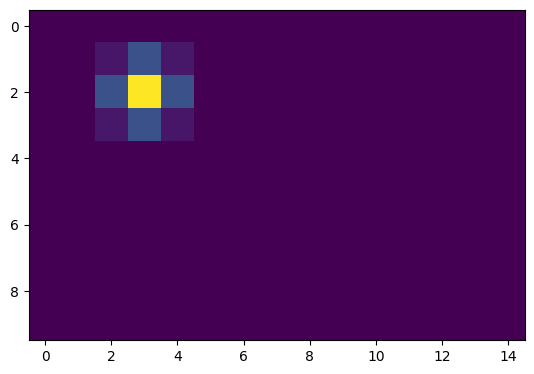

In [8]:
f, _ = plot_next_stream(f)
np.einsum("ijk->", f), rho_nm(f).sum()

150.01000000000002 150.01000000000002
150.01000000000002 150.01000000000002
150.01000000000002 150.01000000000002
150.01000000000002 150.01000000000002
150.01000000000002 150.01000000000002
150.01000000000005 150.01000000000005
150.01000000000005 150.01000000000005
150.01000000000005 150.01000000000005
150.01000000000005 150.01000000000005
150.01000000000005 150.01000000000005


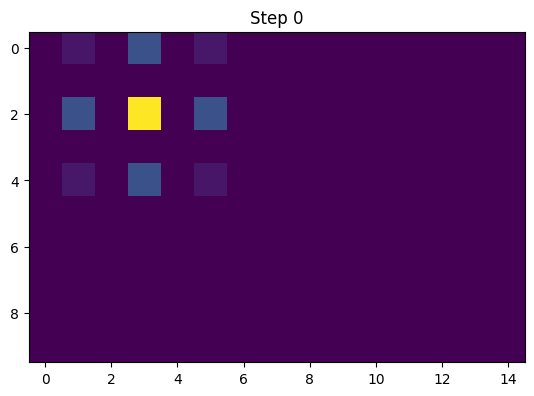

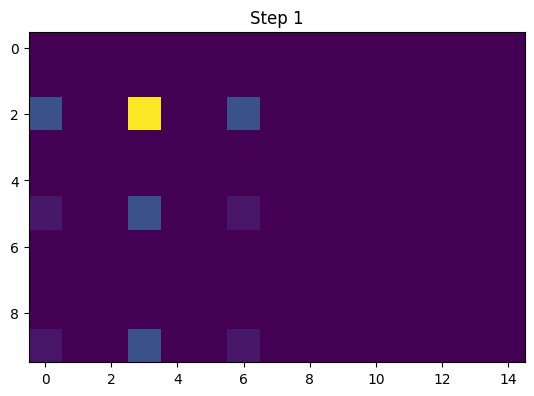

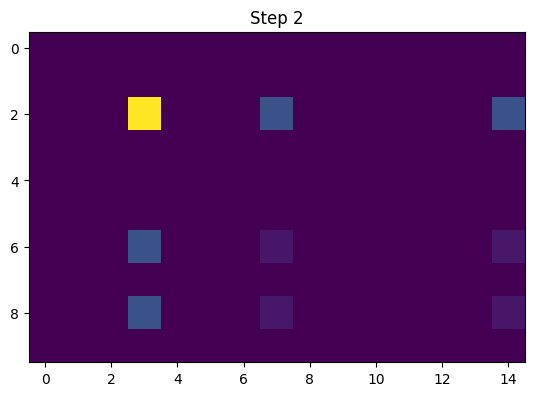

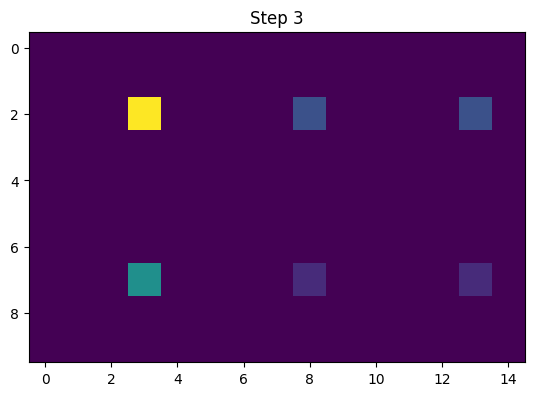

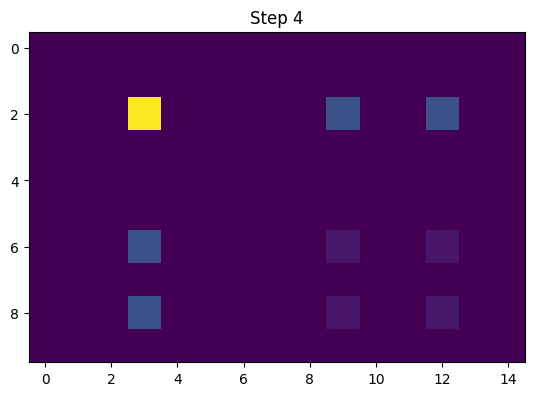

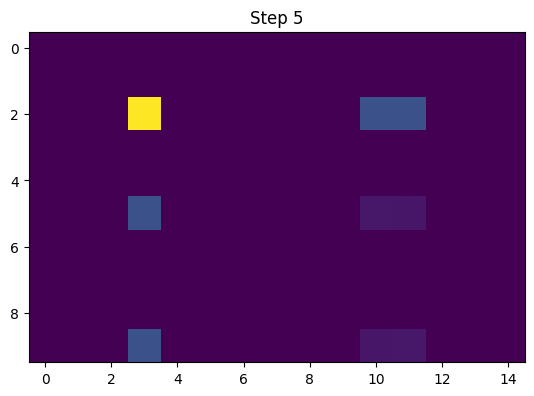

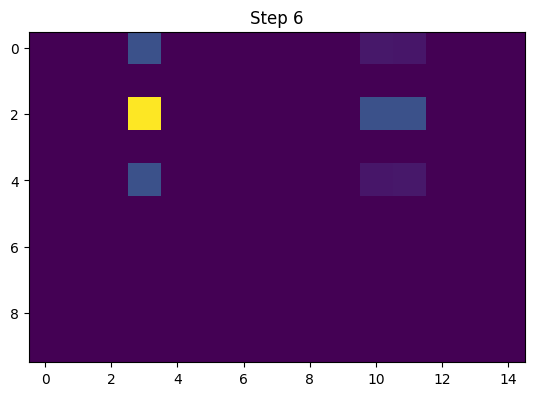

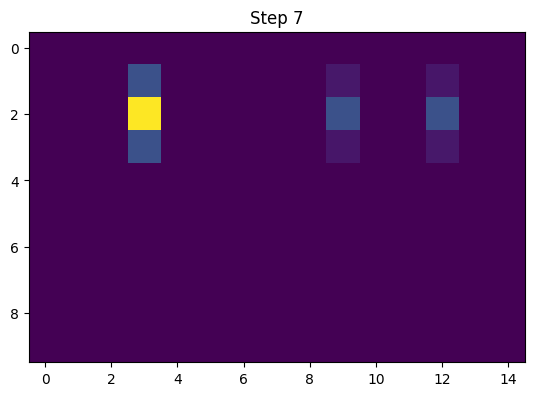

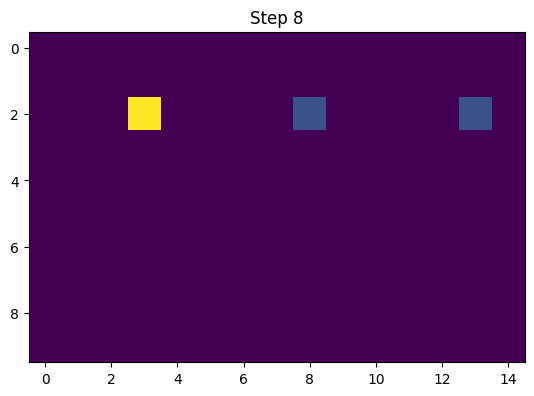

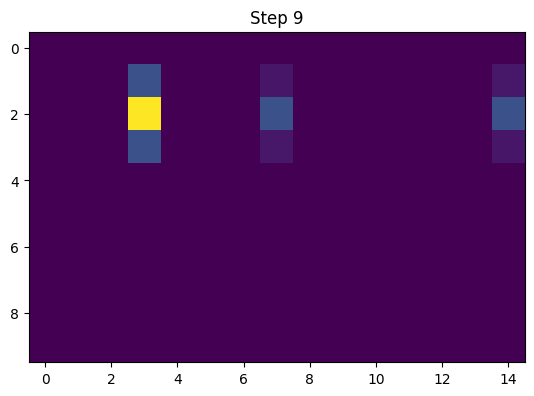

In [9]:
slen = 10
for i in range(slen):
    f, rho = plot_next_stream(f, i)